## **Importando a biblioteca**

In [1]:
import sklearn

## **Base de dados**

In [2]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris
iris

<function sklearn.datasets._base.load_iris>

In [6]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [8]:
batimentos = pd.read_csv('batimentos cardiacos.csv', sep=',')
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [9]:
colesterol = pd.read_csv('colesterol.csv', sep=',')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [10]:
from sklearn.model_selection import train_test_split

x = diabetes['idade']
y = diabetes['resultado']

x_treino, x_teste, y_treino, y_test = train_test_split(x, y)

In [13]:
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [14]:
x = diabetes.drop('resultado', axis=1)
x

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y = diabetes['resultado']
y

0      testado_positivo
1      testado_negativo
2      testado_positivo
3      testado_negativo
4      testado_positivo
             ...       
763    testado_negativo
764    testado_negativo
765    testado_negativo
766    testado_positivo
767    testado_negativo
Name: resultado, Length: 768, dtype: object

In [34]:
from sklearn.model_selection import train_test_split

SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [36]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4121988, splitter='best')

In [37]:
clf_arvore.score(x_teste, y_teste)

0.7135416666666666

In [38]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(x_treino,y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [39]:
clf_dummy.score(x_teste,y_teste)

0.6510416666666666

<function matplotlib.pyplot.show>

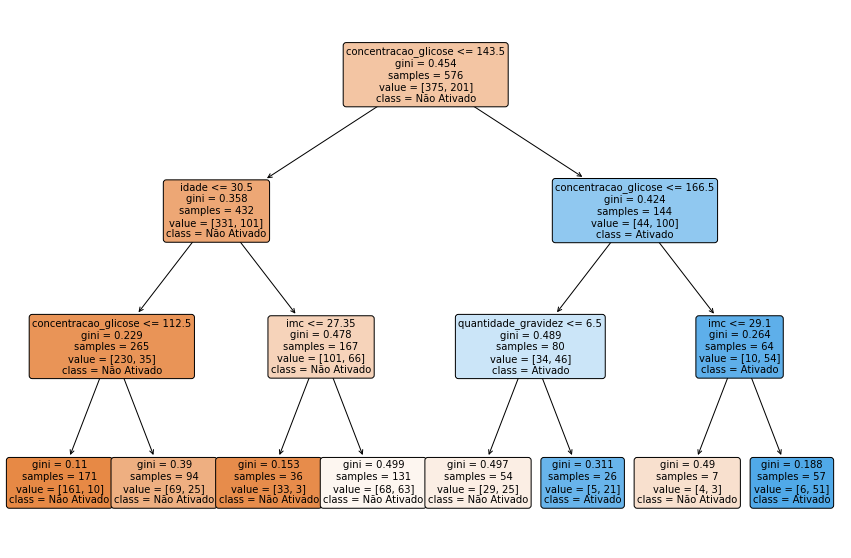

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'], rotate=True)
plt.show

In [42]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


<Figure size 7200x3600 with 0 Axes>

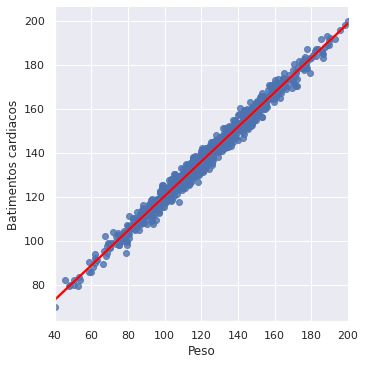

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(100, 50))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,line_kws={'color':'red'})
plt.show()

In [44]:
x = batimentos[['Peso','Idade']]
y = batimentos['Batimentos cardiacos']

from sklearn.model_selection import train_test_split

SEED=4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [45]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [46]:
rgs.fit(x_treino, y_treino)
rgs.score(x_teste, y_teste)

0.9872272899997122

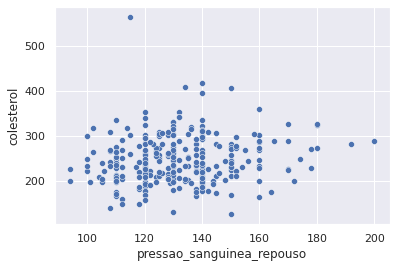

In [47]:
import seaborn as sns

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 9)

In [49]:
x = colesterol.select_dtypes('int64')
kmeans.fit(x)
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

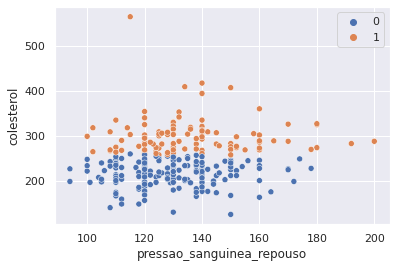

In [50]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, hue = kmeans.labels_)

In [51]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,1
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,0


In [52]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64